# Grouping and Aggregating

In [ ]:
import pandas as pd
import seaborn as sns

One of the most basic analysis functions is grouping and aggregating data. In some cases, this level of analysis may be sufficient to answer business questions. In other instances, this activity might be the first step in a more complex data science analysis. In pandas, the groupby function can be combined with one or more aggregation functions to quickly and easily summarize data. This concept is deceptively simple and most new pandas users will understand this concept. However, they might be surprised at how useful complex aggregation functions can be for supporting sophisticated analysis.

### Aggregating

In the context of this article, an aggregation function is one which takes multiple individual values and returns a summary. In the majority of the cases, this summary is a single value.

In [6]:
df = sns.load_dataset('titanic')

df.agg({"fare":[np.sum],"survived":[np.mean]})

sum     28693.949300
mean       32.204208
Name: fare, dtype: float64

One area that needs to be discussed is that there are multiple ways to call an aggregation function. As shown above, you may pass a list of functions to apply to one or more columns of data.

What if you want to perform the analysis on only a subset of columns? There are two other options for aggregations: using a dictionary or a named aggregation.

Here is a comparison of the the three options:

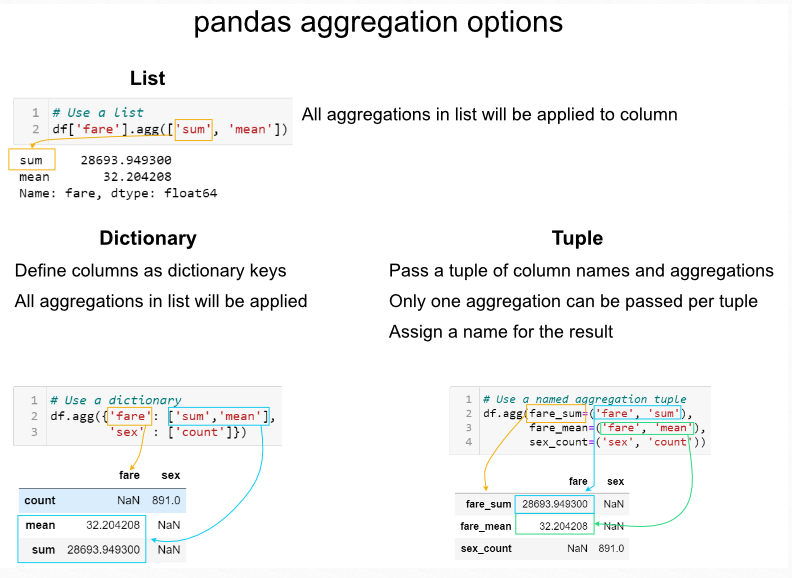

## Groupby

andas dataframe.groupby() function is used to split the data into groups based on some criteria. Pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names.

In [44]:
group = df.groupby(['embark_town'])
group.groups

{'Cherbourg': [1, 9, 19, 26, 30, 31, 34, 36, 39, 42, 43, 48, 52, 54, 57, 60, 64, 65, 73, 96, 97, 111, 114, 118, 122, 125, 128, 130, 135, 139, 140, 155, 174, 177, 181, 194, 195, 203, 207, 209, 215, 218, 240, 244, 255, 256, 258, 273, 285, 291, 292, 295, 296, 299, 306, 307, 308, 309, 310, 311, 319, 325, 329, 337, 352, 354, 361, 362, 366, 367, 369, 370, 373, 375, 377, 378, 380, 381, 389, 393, 420, 448, 452, 453, 455, 469, 473, 484, 487, 493, 495, 496, 505, 513, 522, 523, 524, 531, 532, 533, ...], 'Queenstown': [5, 16, 22, 28, 32, 44, 46, 47, 82, 109, 116, 126, 143, 156, 171, 186, 188, 196, 198, 208, 214, 241, 245, 260, 264, 274, 278, 280, 289, 300, 301, 303, 322, 330, 358, 359, 364, 368, 388, 411, 412, 421, 428, 459, 468, 501, 502, 510, 517, 525, 552, 560, 573, 593, 612, 613, 626, 629, 653, 654, 657, 680, 697, 703, 718, 727, 749, 767, 768, 776, 778, 787, 790, 825, 828, 885, 890], 'Southampton': [0, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21, 23, 24, 25, 27, 29, 33, 35, 37, 38

In [38]:
group.describe().T

embark_town      Cherbourg  Queenstown  Southampton
survived count  168.000000   77.000000   644.000000
         mean     0.553571    0.389610     0.336957
         std      0.498608    0.490860     0.473037
         min      0.000000    0.000000     0.000000
         25%      0.000000    0.000000     0.000000
         50%      1.000000    0.000000     0.000000
         75%      1.000000    1.000000     1.000000
         max      1.000000    1.000000     1.000000
pclass   count  168.000000   77.000000   644.000000
         mean     1.886905    2.909091     2.350932
         std      0.944100    0.369274     0.789402
         min      1.000000    1.000000     1.000000
         25%      1.000000    3.000000     2.000000
         50%      1.000000    3.000000     3.000000
         75%      3.000000    3.000000     3.000000
         max      3.000000    3.000000     3.000000
age      count  130.000000   28.000000   554.000000
         mean    30.814769   28.089286    29.445397
         std     15.434860   16.915396    14.143192
         min      0.420000    2.000000     0.670000
         25%     21.250000   17.500000    21.000000
         50%     29.000000   27.000000    28.000000
         75%     40.000000   34.500000    38.000000
         max     71.000000   70.500000    80.000000
sibsp    count  168.000000   77.000000   644.000000
         mean     0.386905    0.428571     0.571429
         std      0.557213    0.979105     1.216600
         min      0.000000    0.000000     0.000000
         25%      0.000000    0.000000     0.000000
         50%      0.000000    0.000000     0.000000
         75%      1.000000    0.000000     1.000000
         max      2.000000    4.000000     8.000000
parch    count  168.000000   77.000000   644.000000
         mean     0.363095    0.168831     0.413043
         std      0.660481    0.656999     0.853253
         min      0.000000    0.000000     0.000000
         25%      0.000000    0.000000     0.000000
         50%      0.000000    0.000000     0.000000
         75%      1.000000    0.000000     0.000000
         max      3.000000    5.000000     6.000000
fare     count  168.000000   77.000000   644.000000
         mean    59.954144   13.276030    27.079812
         std     83.912994   14.188047    35.887993
         min      4.012500    6.750000     0.000000
         25%     13.697950    7.750000     8.050000
         50%     29.700000    7.750000    13.000000
         75%     78.500025   15.500000    27.900000
         max    512.329200   90.000000   263.000000

## Basic math with groupby

The most common built in aggregation functions are basic math functions including sum, mean, median, minimum, maximum, standard deviation, variance, mean absolute deviation and product.

We can apply all these functions to the fare while grouping by the embark_town :

In [11]:
agg_func_math = {
    'fare':
    ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'mad', 'prod']
}
df.groupby(['embark_town']).agg(agg_func_math).round(2)

C:\Users\rasoo\AppData\Local\Temp\ipykernel_12692\89625269.py:5: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df.groupby(['embark_town']).agg(agg_func_math).round(2)
C:\Users\rasoo\AppData\Local\Temp\ipykernel_12692\89625269.py:5: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df.groupby(['embark_town']).agg(agg_func_math).round(2)
C:\Users\rasoo\AppData\Local\Temp\ipykernel_12692\89625269.py:5: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df.groupby(['embark_town']).agg(agg_func_math).round(2)


fare                                                     \
                  sum   mean median   min     max    std      var    mad   
embark_town                                                                
Cherbourg    10072.30  59.95  29.70  4.01  512.33  83.91  7041.39  53.02   
Queenstown    1022.25  13.28   7.75  6.75   90.00  14.19   201.30   7.87   
Southampton  17439.40  27.08  13.00  0.00  263.00  35.89  1287.95  21.30   

                            
                      prod  
embark_town                 
Cherbourg    6.193716e+250  
Queenstown    6.458671e+78  
Southampton   0.000000e+00

In [12]:
agg_func_describe = {'fare': ['describe']}
df.groupby(['embark_town']).agg(agg_func_describe).round(2)

fare                                                
            describe                                                
               count   mean    std   min    25%    50%   75%     max
embark_town                                                         
Cherbourg      168.0  59.95  83.91  4.01  13.70  29.70  78.5  512.33
Queenstown      77.0  13.28  14.19  6.75   7.75   7.75  15.5   90.00
Southampton    644.0  27.08  35.89  0.00   8.05  13.00  27.9  263.00

## Counting

After basic math, counting is the next most common aggregation I perform on grouped data. In some ways, this can be a little more tricky than the basic math. Here are three examples of counting:

In [13]:
agg_func_count = {'embark_town': ['count', 'nunique', 'size']}
df.groupby(['deck']).agg(agg_func_count)

embark_town             
           count nunique size
deck                         
A             15       2   15
B             45       2   47
C             59       3   59
D             33       2   33
E             32       3   32
F             13       3   13
G              4       1    4